In [3]:
%config InlineBackend.figure_format = 'retina'
%load_ext watermark
%watermark

Last updated: 2024-07-16T21:58:20.303153-04:00

Python implementation: CPython
Python version       : 3.10.12
IPython version      : 8.17.2

Compiler    : GCC 11.4.0
OS          : Linux
Release     : 6.5.0-44-generic
Machine     : x86_64
Processor   : x86_64
CPU cores   : 8
Architecture: 64bit



In [85]:
# Libraries 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)

# Customize the font and title size
custom_params = {
    "axes.titlesize": 14,
    "axes.labelsize": 12,
    "xtick.labelsize": 10,
    "ytick.labelsize": 10,
    "font.family": "Arial"
}
sns.set_context("notebook", rc=custom_params)

# Set a color palette
sns.set_palette("Set2")

# Set global option to display numbers in plain format
pd.set_option('display.float_format', '{:.2f}'.format)

import os

In [67]:
## Auxiliary Functions

def detect_outliers(data, column):
    # Calculate Q1 and Q3
    Q1 = np.percentile(data[column], 25)
    Q3 = np.percentile(data[column], 75)

    # Calculate IQR
    IQR = Q3 - Q1

    # Define the outliers bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    data['Outlier'] = data[column].apply(lambda x: 'YES' if x < lower_bound or x > upper_bound else 'NO')

    return data

    
    # Use NumPy to create a boolean array indicating outliers
    #is_outlier = (data[column] < lower_bound) | (data[column] > upper_bound)
    # Convert the boolean array to 'YES'/'NO'
    #data['Outlier'] = np.where(is_outlier, 'YES', 'NO')
    #return data


def proportion_calc(data, column):
    tmp = data[column].value_counts().reset_index(name = 'count')
    tmp['prop'] = tmp['count']/tmp['count'].sum()*100
    return tmp


In [5]:
# Data 

CustomerData = pd.read_excel('DATA/CustomersData.xlsx')
Discount_Coupon = pd.read_csv('DATA/Discount_Coupon.csv')
Marketing_Spend = pd.read_csv('DATA/Marketing_Spend.csv')
Online_Sales = pd.read_csv('DATA/Online_Sales.csv')
Tax_amount = pd.read_excel('DATA/Tax_amount.xlsx')

In [15]:
## EDA Basic

display(CustomerData.head())
display(Discount_Coupon.head())
display(Marketing_Spend.head())
display(Online_Sales.head())
display(Tax_amount.head())


,CustomerID,Gender,Location,Tenure_Months
0,17850,M,Chicago,12
1,13047,M,California,43
2,12583,M,Chicago,33
3,13748,F,California,30
4,15100,M,California,49


,Month,Product_Category,Coupon_Code,Discount_pct
0,Jan,Apparel,SALE10,10
1,Feb,Apparel,SALE20,20
2,Mar,Apparel,SALE30,30
3,Jan,Nest-USA,ELEC10,10
4,Feb,Nest-USA,ELEC20,20


,Date,Offline_Spend,Online_Spend
0,1/1/2019,4500,2424.50
1,1/2/2019,4500,3480.36
2,1/3/2019,4500,1576.38
3,1/4/2019,4500,2928.55
4,1/5/2019,4500,4055.30


,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status
0,17850,16679,1/1/2019,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used
1,17850,16680,1/1/2019,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used
2,17850,16681,1/1/2019,GGOEGFKQ020399,Google Laptop and Cell Phone Stickers,Office,1,2.05,6.5,Used
3,17850,16682,1/1/2019,GGOEGAAB010516,Google Men's 100% Cotton Short Sleeve Hero Tee...,Apparel,5,17.53,6.5,Not Used
4,17850,16682,1/1/2019,GGOEGBJL013999,Google Canvas Tote Natural/Navy,Bags,1,16.50,6.5,Used


,Product_Category,GST
0,Nest-USA,0.10
1,Office,0.10
2,Apparel,0.18
3,Bags,0.18
4,Drinkware,0.18


In [7]:
display(CustomerData.info())
display(Discount_Coupon.info())
display(Marketing_Spend.info())
display(Online_Sales.info())
display(Tax_amount.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1468 entries, 0 to 1467
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   CustomerID     1468 non-null   int64 
 1   Gender         1468 non-null   object
 2   Location       1468 non-null   object
 3   Tenure_Months  1468 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 46.0+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Month             204 non-null    object
 1   Product_Category  204 non-null    object
 2   Coupon_Code       204 non-null    object
 3   Discount_pct      204 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 6.5+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           365 non-null    object 
 1   Offline_Spend  365 non-null    int64  
 2   Online_Spend   365 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 8.7+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52924 entries, 0 to 52923
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CustomerID           52924 non-null  int64  
 1   Transaction_ID       52924 non-null  int64  
 2   Transaction_Date     52924 non-null  object 
 3   Product_SKU          52924 non-null  object 
 4   Product_Description  52924 non-null  object 
 5   Product_Category     52924 non-null  object 
 6   Quantity             52924 non-null  int64  
 7   Avg_Price            52924 non-null  float64
 8   Delivery_Charges     52924 non-null  float64
 9   Coupon_Status        52924 non-null  object 
dtypes: float64(2), int64(3), object(5)
memory usage: 4.0+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Product_Category  20 non-null     object 
 1   GST               20 non-null     float64
dtypes: float64(1), object(1)
memory usage: 448.0+ bytes


None

In [14]:
display(CustomerData.duplicated().sum())
display(Discount_Coupon.duplicated().sum())
display(Marketing_Spend.duplicated().sum())
display(Online_Sales.duplicated().sum())
display(Tax_amount.duplicated().sum())

0

0

0

0

0

In [13]:
display(CustomerData.isna().sum())
display(Discount_Coupon.isna().sum())
display(Marketing_Spend.isna().sum())
display(Online_Sales.isna().sum())
display(Tax_amount.isna().sum())

CustomerID       0
Gender           0
Location         0
Tenure_Months    0
dtype: int64

Month               0
Product_Category    0
Coupon_Code         0
Discount_pct        0
dtype: int64

Date             0
Offline_Spend    0
Online_Spend     0
dtype: int64

CustomerID             0
Transaction_ID         0
Transaction_Date       0
Product_SKU            0
Product_Description    0
Product_Category       0
Quantity               0
Avg_Price              0
Delivery_Charges       0
Coupon_Status          0
dtype: int64

Product_Category    0
GST                 0
dtype: int64

# EDA

# Question 1

### 1. Calculate Invoice amount or sale_amount or revenue for each transaction and item level 
$$ Invoice Value =[\frac{Quantity*Avg\_price}{(1-Discount\_pct)}*(1+GST)]+Delivery\_Charges$$

In [76]:
# Quantity and Avg_Price

display(Online_Sales[['Quantity', 'Avg_Price', 'Delivery_Charges']].describe())
print(Online_Sales[['Quantity', 'Avg_Price', 'Delivery_Charges']].corr())

,Quantity,Avg_Price,Delivery_Charges
count,52924.000000,52924.000000,52924.000000
mean,4.497638,52.237646,10.517630
std,20.104711,64.006882,19.475613
min,1.000000,0.390000,0.000000
25%,1.000000,5.700000,6.000000
50%,1.000000,16.990000,6.000000
75%,2.000000,102.130000,6.500000
max,900.000000,355.740000,521.360000


                  Quantity  Avg_Price  Delivery_Charges
Quantity          1.000000  -0.113996          0.191383
Avg_Price        -0.113996   1.000000         -0.107799
Delivery_Charges  0.191383  -0.107799          1.000000


In [ ]:
# Graphs for Quantity and Avg_Price

fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# Boxplot for Quantity
f1 = sns.boxplot(Online_Sales['Quantity'], ax=axes[0, 0])
f1.set_title('Boxplot: Quantity')

# Histogram for Quantity
f2 = sns.histplot(np.log(Online_Sales['Quantity']), ax=axes[0, 1])
f2.set_title('Histogram: log(Quantity)')

# Boxplot for Avg_Price
f3 = sns.boxplot(Online_Sales['Avg_Price'], ax=axes[1, 0])
f3.set_title('Boxplot: Avg_Price')

# Histogram for Avg_Price
f4 = sns.histplot(Online_Sales['Avg_Price'], ax=axes[1, 1])
f4.set_title('Histogram: Avg_Price')

plt.tight_layout()
plt.show()

- Create a new_var to identy the outliers and to use a diferent colors to show in a scatterplot

In [40]:
detect_outliers(Online_Sales, 'Quantity')

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,Outlier
0,17850,16679,1/1/2019,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.50,Used,NO
1,17850,16680,1/1/2019,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.50,Used,NO
2,17850,16681,1/1/2019,GGOEGFKQ020399,Google Laptop and Cell Phone Stickers,Office,1,2.05,6.50,Used,NO
3,17850,16682,1/1/2019,GGOEGAAB010516,Google Men's 100% Cotton Short Sleeve Hero Tee...,Apparel,5,17.53,6.50,Not Used,YES
4,17850,16682,1/1/2019,GGOEGBJL013999,Google Canvas Tote Natural/Navy,Bags,1,16.50,6.50,Used,NO
...,...,...,...,...,...,...,...,...,...,...,...
52919,14410,48493,12/31/2019,GGOENEBB078899,Nest Cam Indoor Security Camera - USA,Nest-USA,1,121.30,6.50,Clicked,NO
52920,14410,48494,12/31/2019,GGOEGAEB091117,Google Zip Hoodie Black,Apparel,1,48.92,6.50,Used,NO
52921,14410,48495,12/31/2019,GGOENEBQ084699,Nest Learning Thermostat 3rd Gen-USA - White,Nest-USA,1,151.88,6.50,Used,NO
52922,14600,48496,12/31/2019,GGOENEBQ079199,Nest Protect Smoke + CO White Wired Alarm-USA,Nest-USA,5,80.52,6.50,Clicked,YES


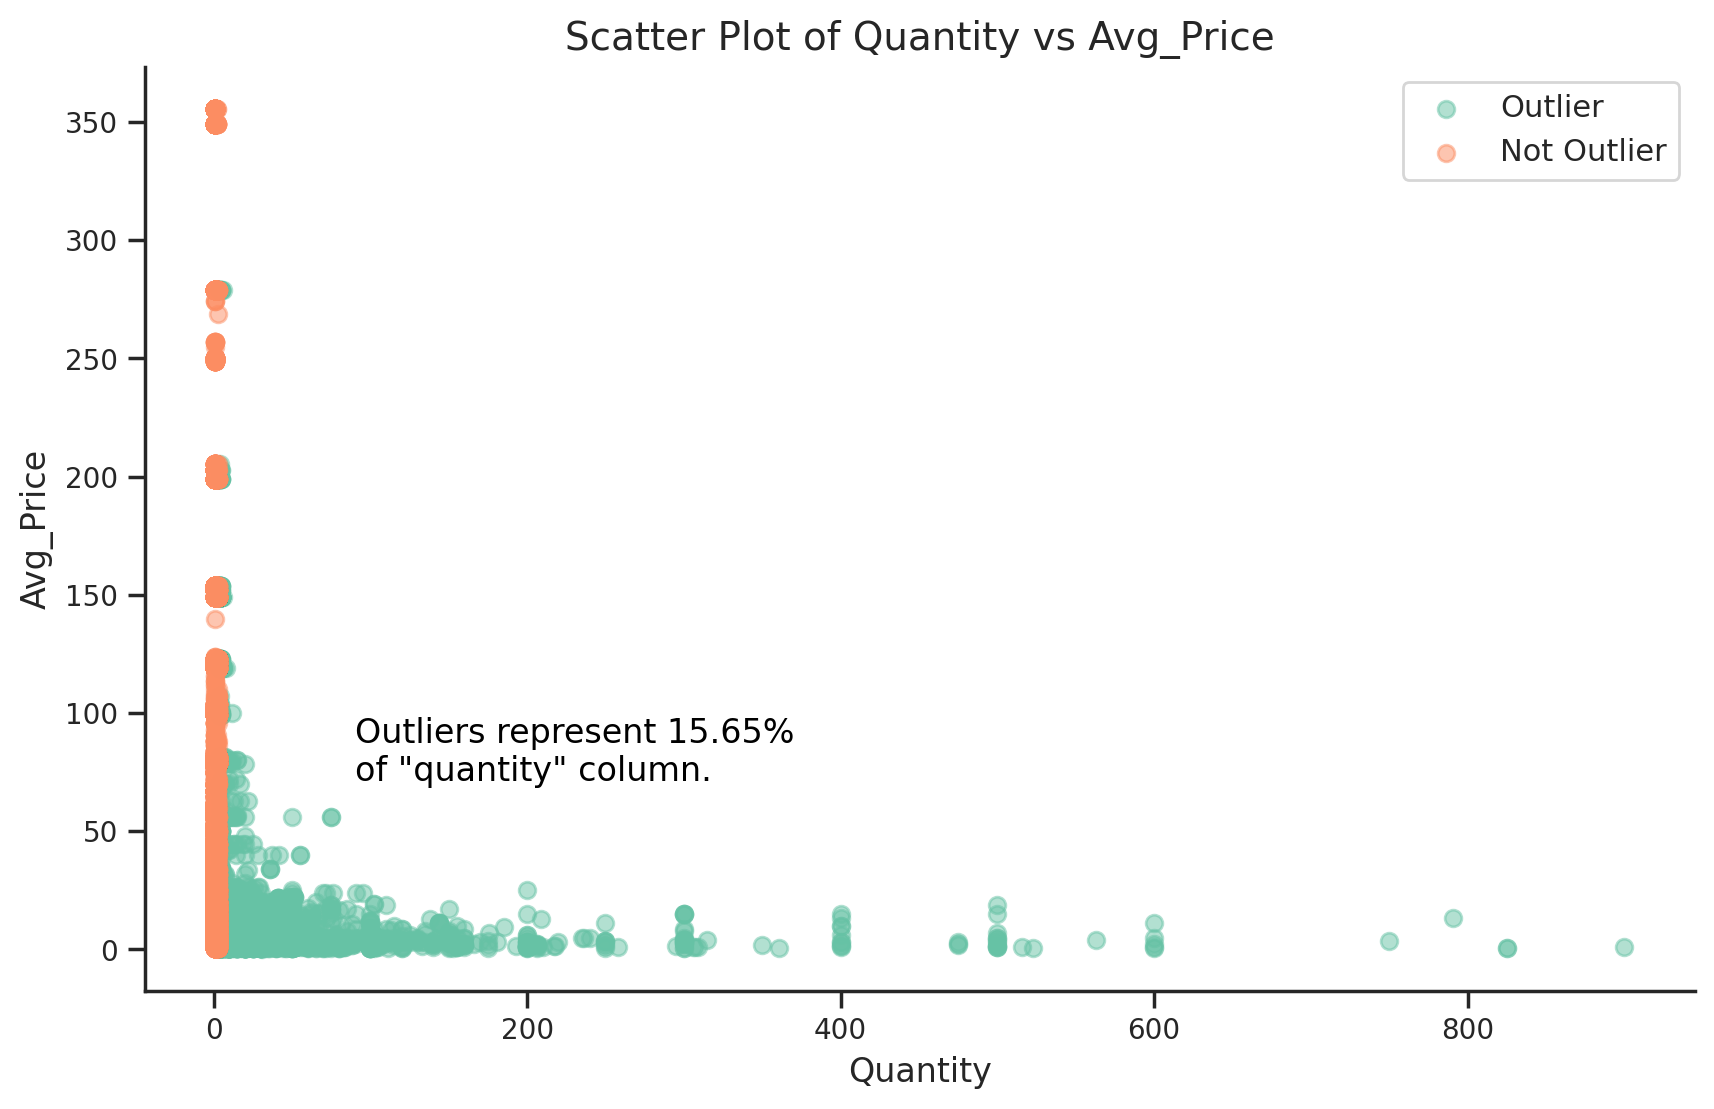

In [52]:
# Proportion of outliers
outlier_proportion = (Online_Sales['Outlier'] == 'YES').mean() * 100

plt.figure(figsize=(10,6))


# Plot outliers
plt.scatter(Online_Sales[Online_Sales['Outlier'] == 'YES']['Quantity'],
            Online_Sales[Online_Sales['Outlier'] == 'YES']['Avg_Price'],
            label = 'Outlier', alpha=.5)

# Plot no-outliers
plt.scatter(Online_Sales[Online_Sales['Outlier'] == 'NO']['Quantity'],
            Online_Sales[Online_Sales['Outlier'] == 'NO']['Avg_Price'],
            label = 'Not Outlier', alpha=.5)

# Add text annotation
plt.text(x=max(Online_Sales['Quantity']) * 0.1, 
         y=max(Online_Sales['Avg_Price']) * 0.2, 
         s=f'Outliers represent {outlier_proportion:.2f}%\nof "quantity" column.', 
         fontsize=12, color='black')

plt.xlabel('Quantity')
plt.ylabel('Avg_Price')
plt.title('Scatter Plot of Quantity vs Avg_Price')
plt.legend()
plt.show()


In [54]:
Online_Sales[Online_Sales['Outlier'] == 'YES'].sort_values('Quantity', ascending= False)

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,Outlier
42456,14541,40835,10/16/2019,GGOEGGOA017399,Maze Pen,Office,900,0.99,12.99,Used,YES
21364,17858,29898,6/8/2019,GGOEGGOA017399,Maze Pen,Office,825,0.79,85.33,Used,YES
20992,16782,29657,6/5/2019,GGOEGGOA017399,Maze Pen,Office,825,0.79,85.33,Used,YES
30192,15194,34429,8/2/2019,GGOEGHPJ080310,Google Blackout Cap,Headgear,791,13.29,6.00,Used,YES
12173,13113,24863,4/5/2019,GGOEGHGH019699,Google Sunglasses,Lifestyle,750,3.50,6.50,Used,YES
...,...,...,...,...,...,...,...,...,...,...,...
18295,14085,28170,5/16/2019,GGOEGAWQ062948,Google Baby Essentials Set,Apparel,4,27.19,6.50,Used,YES
18296,14085,28170,5/16/2019,GGOEGFKQ020399,Google Laptop and Cell Phone Stickers,Office,4,2.39,6.50,Clicked,YES
18302,14085,28170,5/16/2019,GGOEYFKQ020699,YouTube Custom Decals,Office,4,1.59,6.50,Used,YES
42100,15039,40614,10/13/2019,GGOENEBQ078999,Nest Cam Outdoor Security Camera - USA,Nest-USA,4,119.00,6.00,Used,YES


- Looking at the outliers, 15% of the values are considering outliers according the Boxplot. A glance at this data, quantities equal or higer than 4 are considering outliers. Plotting a scatterplot, we can see a concentration of these data in a lower 'avg_price'.
- There is no evidencies of a wrong registers or invalid numbers.
- For calculate the Income, I will use the data without removing these values because they seems a possible values for a e-commerce.

In [68]:
# Discount_pct

proportion_calc(Discount_Coupon, 'Discount_pct')

,index,count,prop
0,10,68,33.333333
1,20,68,33.333333
2,30,68,33.333333


In [69]:
# GST
proportion_calc(Tax_amount, 'GST')

,index,count,prop
0,0.10,7,35.0
1,0.18,7,35.0
2,0.05,5,25.0
3,0.12,1,5.0


In [75]:
# Delivery Charge
Online_Sales['Delivery_Charges'].describe()

count    52924.000000
mean        10.517630
std         19.475613
min          0.000000
25%          6.000000
50%          6.000000
75%          6.500000
max        521.360000
Name: Delivery_Charges, dtype: float64

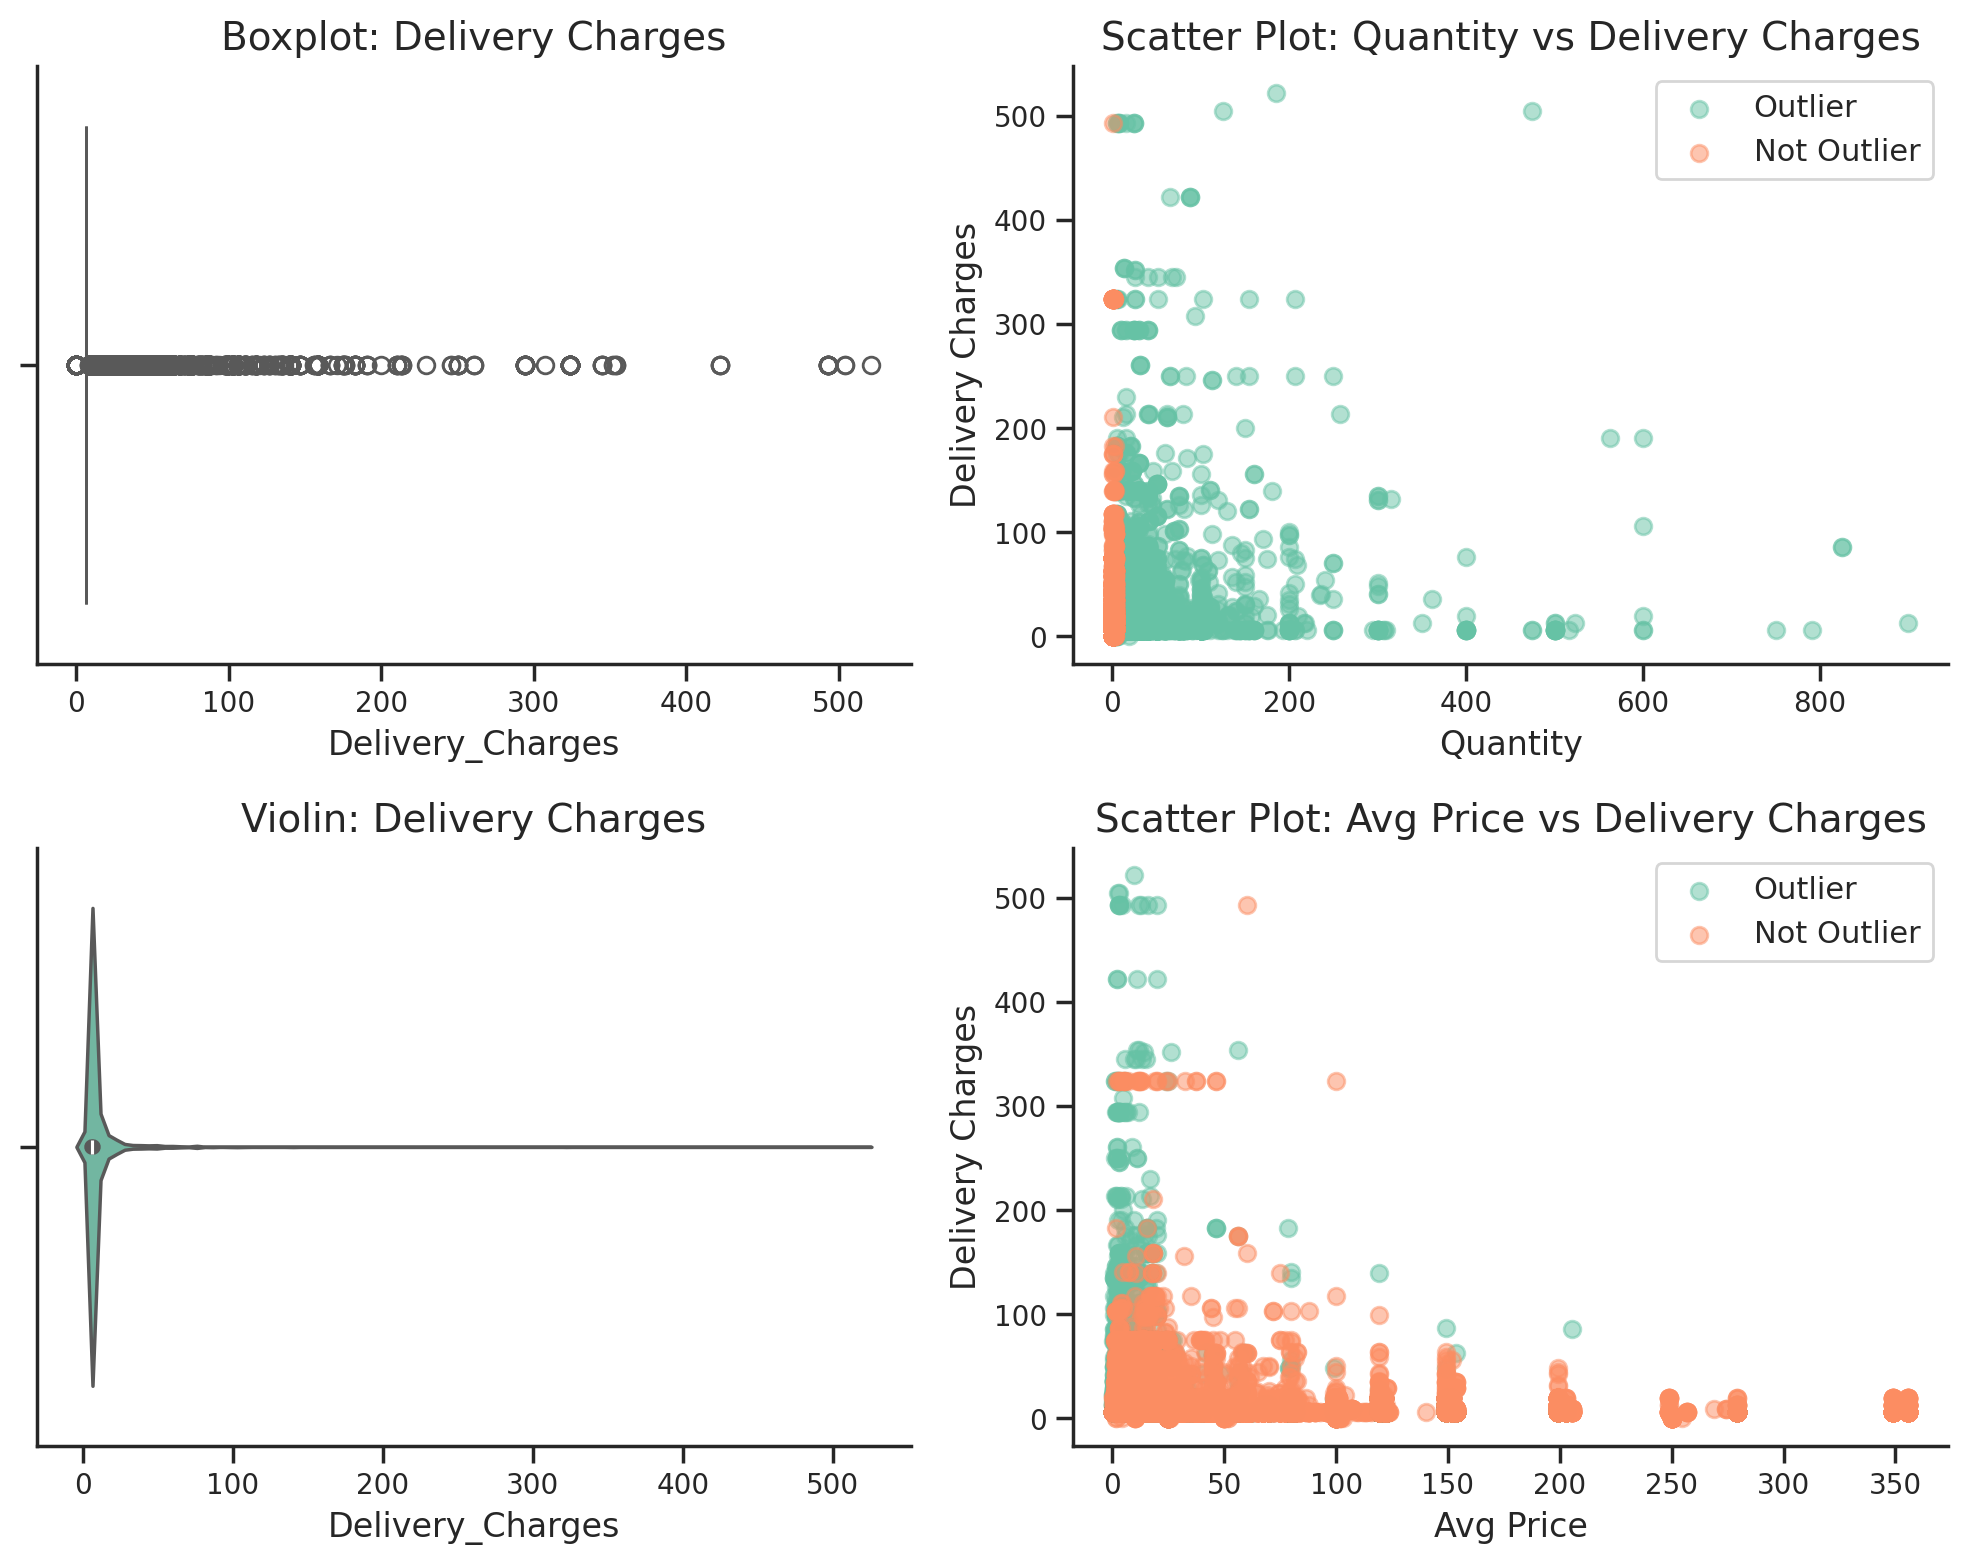

In [84]:
# Create the subplots
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# Boxplot for Delivery_Charges
sns.boxplot(x=Online_Sales['Delivery_Charges'], ax=axes[0, 0])
axes[0, 0].set_title('Boxplot: Delivery Charges')

# Scatter plot for Outliers and Not Outliers
axes[0, 1].scatter(Online_Sales[Online_Sales['Outlier'] == 'YES']['Quantity'],
                   Online_Sales[Online_Sales['Outlier'] == 'YES']['Delivery_Charges'],
                   label='Outlier', alpha=0.5)

axes[0, 1].scatter(Online_Sales[Online_Sales['Outlier'] == 'NO']['Quantity'],
                   Online_Sales[Online_Sales['Outlier'] == 'NO']['Delivery_Charges'],
                   label='Not Outlier', alpha=0.5)

axes[0, 1].set_title('Scatter Plot: Quantity vs Delivery Charges')
axes[0, 1].set_xlabel('Quantity')
axes[0, 1].set_ylabel('Delivery Charges')
axes[0, 1].legend()

# Add other plots as needed
# Example: Boxplot and Scatter plot for Avg_Price and Delivery_Charges
sns.violinplot(x=Online_Sales['Delivery_Charges'], ax=axes[1, 0])
axes[1, 0].set_title('Violin: Delivery Charges')

axes[1, 1].scatter(Online_Sales[Online_Sales['Outlier'] == 'YES']['Avg_Price'],
                   Online_Sales[Online_Sales['Outlier'] == 'YES']['Delivery_Charges'],
                   label='Outlier', alpha=0.5)

axes[1, 1].scatter(Online_Sales[Online_Sales['Outlier'] == 'NO']['Avg_Price'],
                   Online_Sales[Online_Sales['Outlier'] == 'NO']['Delivery_Charges'],
                   label='Not Outlier', alpha=0.5)

axes[1, 1].set_title('Scatter Plot: Avg Price vs Delivery Charges')
axes[1, 1].set_xlabel('Avg Price')
axes[1, 1].set_ylabel('Delivery Charges')
axes[1, 1].legend()

plt.tight_layout()
plt.show()